# ADS - Network analysis module, homework 1

In [1]:
#add necessary libraries
import pycombo # combo community detection package
import networkx as nx #library supporting networks
from networkx.algorithms import community
import matplotlib.pyplot as plt #plotting
import pandas as pd
import numpy as np
import scipy.stats as stat
import numpy as np
#make sure plots are embedded into the notebook
%pylab inline 
import statsmodels.api as sm
import warnings
import geopandas as gpd
warnings.filterwarnings('ignore')

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Task 1. Analysis of Les Miserables network 

In [2]:
#uploading the classical coappearance network of characters in the novel "Les Miserables" to analyze
#first download the data from https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/lesmis.gml
!wget https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/lesmis.gml
G = nx.read_gml('lesmis.gml') 

--2023-04-11 20:11:13--  https://raw.githubusercontent.com/CUSP2021ADS/Data/main/ClassicNet/lesmis.gml
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 17610 (17K) [text/plain]
Saving to: 'lesmis.gml.6'

lesmis.gml.6        100%[===================>]  17.20K  --.-KB/s    in 0s      

2023-04-11 20:11:13 (75.6 MB/s) - 'lesmis.gml.6' saved [17610/17610]



### Q1. Visualize the network below with node labes and sizes proportional to node degree

<Figure size 1440x1440 with 0 Axes>

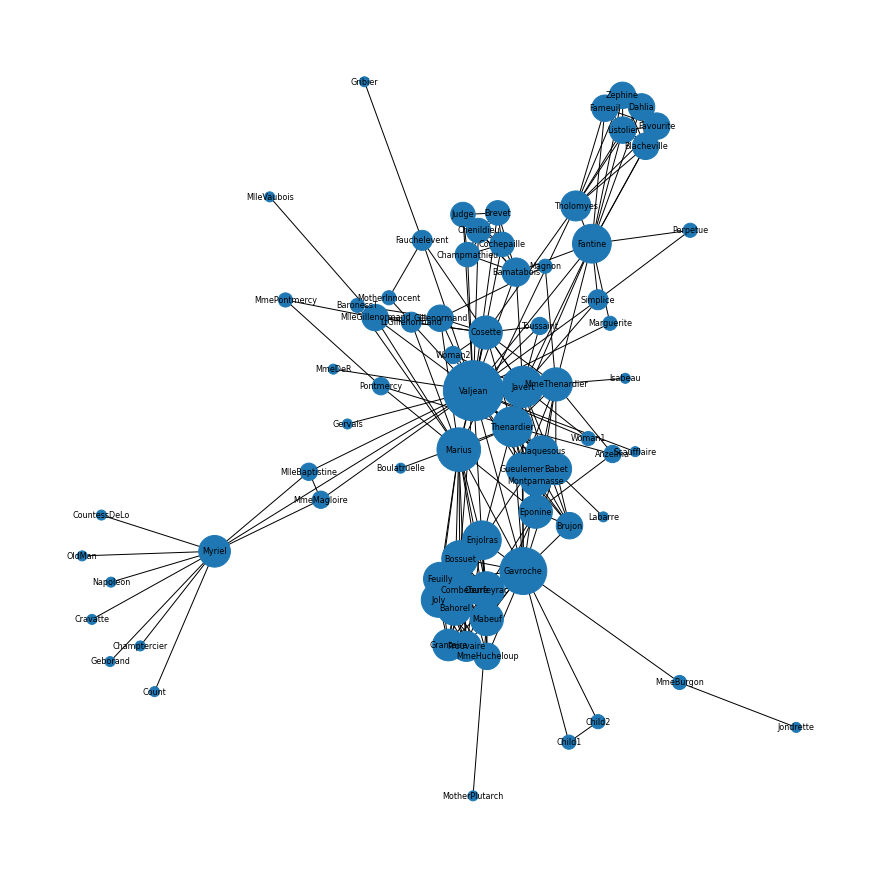

In [3]:
#get the degree first
node_degrees = dict(G.degree())
pos = nx.spring_layout(G)
plt.figure(figsize = (20,20))
np.random.seed(123)
plt.figure(3,figsize=(12,12)) 
nx.draw(G, pos, with_labels=True, node_size=[v*100 for v in node_degrees.values()],font_size=8)
plt.show()

### Q2. Report top nodes by centrality
Print the node labels and corresponding centrality measure for top 5 nodes in terms of

a) degree centrality;

b) betweenness centrality;

c) closeness centrality;

In [4]:
#Report top nodes by centrality
#degree centrality
#method 1
deg_cent = nx.degree_centrality(G)
top_deg_cent = sorted(deg_cent.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by degree centrality:")
for node, deg_centrality in top_deg_cent:
    print("Node", node, "has degree centrality", deg_centrality)

Top 5 nodes by degree centrality:
Node Valjean has degree centrality 0.47368421052631576
Node Gavroche has degree centrality 0.2894736842105263
Node Marius has degree centrality 0.25
Node Javert has degree centrality 0.22368421052631576
Node Thenardier has degree centrality 0.21052631578947367


In [5]:
#degree centrality
#method 2
Top5degree=sorted(node_degrees.values(),reverse=True)[4]

print("Top 5 nodes by degree centrality:")
for d in G:
    if node_degrees[d]>=Top5degree:
         print("Node", d, "has degree centrality", node_degrees[d])

Top 5 nodes by degree centrality:
Node Valjean has degree centrality 36
Node Thenardier has degree centrality 16
Node Javert has degree centrality 17
Node Gavroche has degree centrality 22
Node Marius has degree centrality 19


In [6]:
#betweenness centrality
# calculate betweenness centrality
bet_cent = nx.betweenness_centrality(G)

# get top 5 nodes by betweenness centrality
top_bet_cent = sorted(bet_cent.items(), key=lambda x: x[1], reverse=True)[:5]

# print the top 5 nodes and their betweenness centrality measures
print("Top 5 nodes by betweenness centrality:")
for node, bet_centrality in top_bet_cent:
    print("Node", node, "has betweenness centrality", bet_centrality)

Top 5 nodes by betweenness centrality:
Node Valjean has betweenness centrality 0.5699890527836184
Node Myriel has betweenness centrality 0.17684210526315788
Node Gavroche has betweenness centrality 0.16511250242584766
Node Marius has betweenness centrality 0.132032488621946
Node Fantine has betweenness centrality 0.12964454098819422


In [7]:
#closeness centrality;
# calculate closeness centrality
clo_cent = nx.closeness_centrality(G)

# get top 5 nodes by closeness centrality
top_clo_cent = sorted(clo_cent.items(), key=lambda x: x[1], reverse=True)[:5]

# print the top 5 nodes and their closeness centrality measures
print("Top 5 nodes by closeness centrality:")
for node, clo_centrality in top_clo_cent:
    print("Node", node, "has closeness centrality", clo_centrality)

Top 5 nodes by closeness centrality:
Node Valjean has closeness centrality 0.6440677966101694
Node Marius has closeness centrality 0.5314685314685315
Node Thenardier has closeness centrality 0.5170068027210885
Node Javert has closeness centrality 0.5170068027210885
Node Gavroche has closeness centrality 0.5135135135135135


### Q3. Analyze stability of Pagerank centrality
Analyze the impact of parameter $\alpha$ in pagerank centrality for the given network: compare top 5 nodes for different values of $\alpha=0.95, 0.9, 0.85, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1$ and point out an interval for which the ranking remains mostly stable.

In [8]:
# compare top 5 nodes for different values of alpha
for alpha in [0.95,0.9,0.85,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1]:
    # calculate pagerank centrality
    pr_cent = nx.pagerank(G, alpha=alpha)

    # get top 5 nodes by pagerank centrality
    top_pr_cent = sorted(pr_cent.items(), key=lambda x: x[1], reverse=True)[:5]

    # print the top 5 nodes and their pagerank centrality measures for the current alpha value
    print("Top 5 nodes for alpha =", alpha)
    for node, pr_centrality in top_pr_cent:
        print("Node", node, "has pagerank centrality", pr_centrality)

    # print a blank line to separate the results for different alpha values
    print()



Top 5 nodes for alpha = 0.95
Node Valjean has pagerank centrality 0.0747043161907721
Node Gavroche has pagerank centrality 0.039552887183772374
Node Marius has pagerank centrality 0.03430243839798216
Node Myriel has pagerank centrality 0.03346062881293949
Node Javert has pagerank centrality 0.032395931752677784

Top 5 nodes for alpha = 0.9
Node Valjean has pagerank centrality 0.07570137903943519
Node Myriel has pagerank centrality 0.03965531861134031
Node Gavroche has pagerank centrality 0.03739018829226064
Node Marius has pagerank centrality 0.032383657652848966
Node Javert has pagerank centrality 0.031346318732229914

Top 5 nodes for alpha = 0.85
Node Valjean has pagerank centrality 0.07543374445332475
Node Myriel has pagerank centrality 0.04280343976075732
Node Gavroche has pagerank centrality 0.03576412343161934
Node Marius has pagerank centrality 0.030892701920406464
Node Javert has pagerank centrality 0.03030259712717036

Top 5 nodes for alpha = 0.8
Node Valjean has pagerank cent

As we can see from the result, the rank is stable for the value and the same for the index between [0.7,0.9] For alpha values lower than 0.7, the ranking starts to become less stable and last two nodes start to drop down in the rankings. Therefore, we can conclude that the ranking remains mostly stable for alpha values between 0.7 and 0.9.



### Q4. Partition the network using any available algorithm of your choice (e.g. Combo), report network partition modularity score and visualize the partition (different communities with different colors)

Modularity score: 0.5527


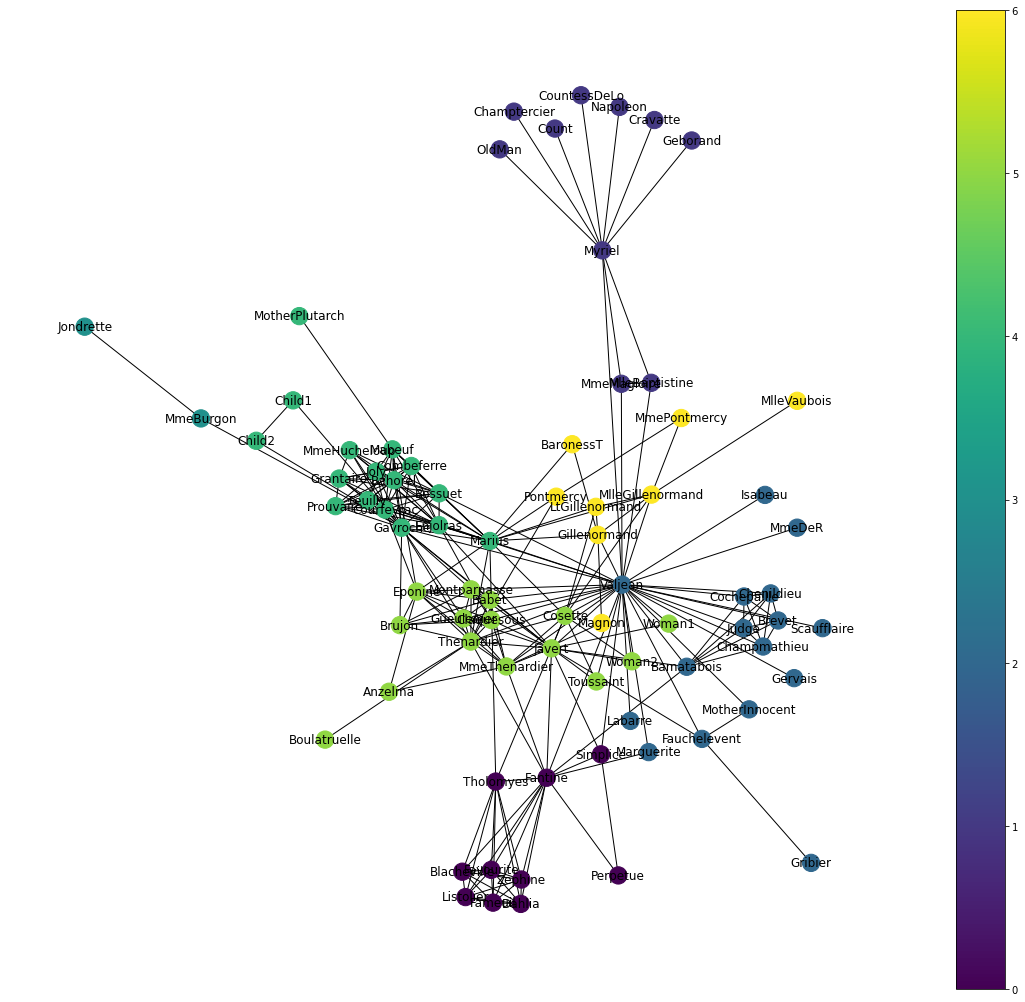

In [9]:
import community
from community import community_louvain

#using the Louvain algorithm
pr = community_louvain.best_partition(G)
MD = community_louvain.modularity(pr, G)
print("Modularity score: {:.4f}".format(MD))
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# Visualize the partition
plt.figure(figsize = (20,18))
pos = nx.spring_layout(G)
nodes = nx.draw_networkx_nodes(G, pos, node_color=list(pr.values()))
edges = nx.draw_networkx_edges(G, pos)
labels = nx.draw_networkx_labels(G, pos)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

## Task 2 (World airports). 
### Q1. 
Find connected components, report their number and the sizes.  

### Q2. 
In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

### Q3. 
Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

### Q4. 
Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$)

### Q5.
Partition the network using Combo algorithm, visualize the partition 


In [10]:
cities = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/airportData/citiesTable.csv', index_col=0 )
cities.head()

,country name,most active airport,long. most active airport,lat. most active airport,number of routes,number incoming flights,number outcoming flights,number incoming domestic flights,number outcoming domestic flights,number incoming international flights,number outcoming international flights,only domestic flights,average distance,max. distance
city name,,,,,,,,,,,,,,
London,United Kingdom,Heathrow,-0.103,51.795,1984,993,992,57,57,936,934,0,3228,11153
Chicago,United States,Chicago Ohare Intl,-87.842,42.631,1406,705,702,526,523,179,178,0,2328,12416
Paris,France,Charles De Gaulle,2.916,49.021,1254,626,629,68,68,558,560,0,3367,11652
Moscow,Russia,Domododevo,38.510,55.681,1179,589,591,231,231,358,359,0,2772,10054
Shanghai,China,Pudong,122.342,31.238,1115,560,556,357,353,203,202,0,2235,12245


In [11]:
#create a network with city names as nodes
Flights=nx.Graph()
Flights.add_nodes_from(cities.index)

In [12]:
#now read the links
links = pd.read_csv('https://raw.githubusercontent.com/CUSP2021ADS/Data/main/airportData/citiesToCities.csv' , index_col=None )
links.head()

,departure city,long. departure (decimal),lat. departure (decimal),departure country,arrival city,long. departure (decimal).1,lat. departure (decimal).1,arrival country,number of routes,distance
0,Sao Paulo,-46.116,-23.054,Brazil,Rio De Janeiro,-42.740,-22.682,Brazil,18,348
1,Rio De Janeiro,-42.740,-22.682,Brazil,Sao Paulo,-46.116,-23.054,Brazil,18,348
2,Beijing,116.974,40.133,China,Shanghai,122.342,31.238,China,18,1100
3,Johannesburg,28.410,-25.566,South Africa,Cape Town,19.002,-33.942,South Africa,16,1299
4,Honolulu,-157.871,21.531,United States,Tokyo,140.643,36.274,Japan,16,6103


In [13]:
#create list of edges as tuples
EN=len(links.index)
edgelist=[(links['departure city'][j],links['arrival city'][j]) for j in range(EN)]

In [14]:
#add edges to the network
Flights.add_edges_from(edgelist)

a) Find connected components, report their number and the sizes.  

In [15]:
#connected component
components=list(nx.connected_components(Flights))
nx.number_connected_components(Flights)

4

In [16]:
# report their number and the sizes.
number=len(components)
size=[len(i) for i in components]
size

[2981, 3, 2, 2]

b) In the largest connected component find and report (print a list of city names and centrality scores) top 10 airports by each centrality metric (degree, betweenneass, closeness, pagerank with $alpha=0.85$). 

In [17]:
largest_connected=max(nx.connected_components(Flights),key=len)
flights_connected=Flights.subgraph(largest_connected)

In [18]:
#degree
degree_centrality=nx.degree_centrality(flights_connected)
print('Top 10 airports by degree centrality is: ')
for airports, scores in sorted(degree_centrality.items(),key=lambda x:x[1],reverse=True)[:10]:
    print(f'{cities.loc[airports].name}: {scores}')

Top 10 airports by degree centrality is: 
London: 0.10436241610738255
Paris: 0.08959731543624161
Frankfurt: 0.07785234899328859
Moscow: 0.07684563758389261
Amsterdam: 0.0697986577181208
Atlanta: 0.0697986577181208
Chicago: 0.06677852348993288
Beijing: 0.06174496644295302
Istanbul: 0.060738255033557044
Dallas-fort Worth: 0.060738255033557044


In [19]:
#betweenness
betweenness_centrality=nx.betweenness_centrality(flights_connected)
print('Top 10 airports by betweenness centrality is: ')
for airports, scores in sorted(betweenness_centrality.items(),key=lambda x:x[1],reverse=True)[:10]:
    print(f'{cities.loc[airports].name}: {scores}')

Top 10 airports by betweenness centrality is: 
London: 0.09076727836638496
Anchorage: 0.08216371312591912
Paris: 0.07784192121669775
Moscow: 0.061038019702898835
Chicago: 0.05813492835186721
Frankfurt: 0.05452341641775677
Seattle: 0.052719585605351275
Dubai: 0.04644272199874113
Tokyo: 0.0458546447882062
Toronto: 0.04531466582661801


In [20]:
#closeness
closeness_centrality=nx.closeness_centrality(flights_connected)
print('Top 10 airports by closeness centrality is: ')
for airports, scores in sorted(closeness_centrality.items(),key=lambda x:x[1],reverse=True)[:10]:
    print(f'{cities.loc[airports].name}: {scores}')

Top 10 airports by closeness centrality is: 
London: 0.42335559028271064
Frankfurt: 0.4174838890445503
Paris: 0.41637557635880956
Amsterdam: 0.4094531464688101
New York: 0.40053763440860213
Toronto: 0.39632929910892406
Los Angeles: 0.39601328903654487
Chicago: 0.3927253558249868
Dubai: 0.3926218708827404
Newark: 0.38964435146443516


In [21]:
#pagerank with alpha=0.85
pagerank_centrality=nx.pagerank(flights_connected,0.85)
print('Top 10 airports by pagerank centrality is: ')
for airports, scores in sorted(pagerank_centrality.items(),key=lambda x:x[1],reverse=True)[:10]:
    print(f'{cities.loc[airports].name}: {scores}')

Top 10 airports by pagerank centrality is: 
London: 0.006659290961342691
Moscow: 0.006409790102955385
Paris: 0.006295939941422259
Atlanta: 0.005016918307551105
Frankfurt: 0.004802779385676399
Chicago: 0.0047098249542551355
Dallas-fort Worth: 0.004693215881889283
Denver: 0.004626422093445785
Houston: 0.0043983802140522875
Amsterdam: 0.004312131801712508


c) Find maximum and average network distance of the shortest path (number of edges, regardless of size) between all pairs of the airports from the largest connected component. Visualize the shortest path of the maximum length.

In [22]:
#short path
shortest_path=dict(nx.shortest_path_length(flights_connected))

In [23]:
max_path=max(max(shortest_path[source].values())for source in shortest_path.keys())
avg_path=nx.average_shortest_path_length(flights_connected)
print('Average network distance of the shortest path length is: ', avg_path)

Average network distance of the shortest path length is:  3.939842942663716


In [24]:
max_path=max(max(shortest_path[i].values())for i in shortest_path.keys())
print('Maximum network distance of the shortest path length : ', max_path)

Maximum network distance of the shortest path length :  12


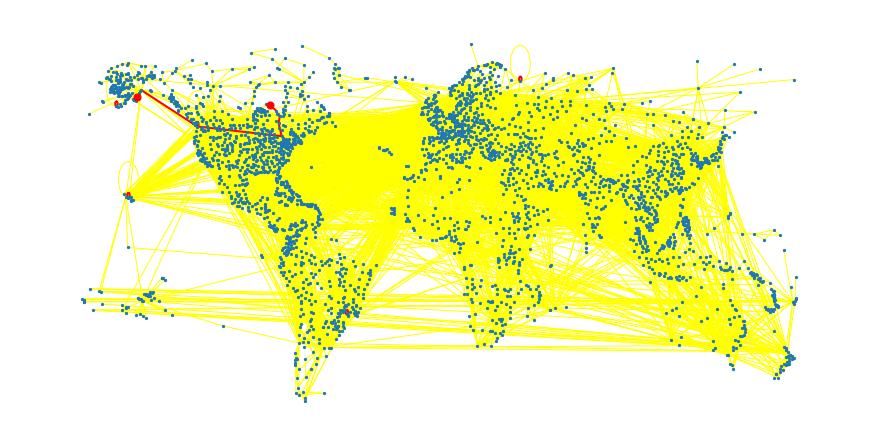

In [47]:
# Find nodes with maximum distance
shortest_path_lengths = shortest_path
start, end = None, None
max_distance = 0
for node, lengths in shortest_path_lengths.items():
    if max(lengths.values()) > max_distance:
        max_distance = max(lengths.values())
        start = node
        end = max(lengths, key=lengths.get)

# Find shortest path between nodes
shortest_path_vis = nx.shortest_path(flights_connected, start, end)

# Draw graph with shortest path highlighted
plt.figure(figsize=(12, 6))
pos = {c: (cities.loc[c, 'long. most active airport'], cities.loc[c, 'lat. most active airport']) for c in flights_connected.nodes()}
nx.draw(flights_connected, pos=pos, node_size=5,edge_color='yellow')
nx.draw_networkx_nodes(flights_connected, pos=pos, nodelist=[start, end], node_color='r', node_size=50)
nx.draw_networkx_edges(flights_connected, pos=pos, edgelist=list(nx.utils.pairwise(shortest_path_vis)), edge_color='r', width=2)
plt.show()


d) Find average network distance among the top 100 airports by pagerank (with $alpha=0.85$)

In [26]:
page_rank=nx.pagerank(Flights,alpha=0.85)
top_100=sorted(page_rank,key=page_rank.get,reverse=True)[:100]
airport_100=Flights.subgraph(top_100)
avg_shortest_path=nx.average_shortest_path_length(airport_100)
print('Average network distance among the top 100 airports by pagerank :',avg_shortest_path)

Average network distance among the top 100 airports by pagerank : 1.7375757575757576


e) Partition the network using Combo algorithm, visualize the partition 

In [27]:
def VisualPar(G,partition,pos):
    c=[]
    plt.figure(figsize=(12,8))
    PN=max(partition.values())
    my_cmap = matplotlib.cm.hsv(np.linspace(0,1,PN+1)) 
    for n in G.nodes():
        c.append(1.0*partition[n]/PN)
    nx.draw(G,pos=pos,with_labels=False,arrows=True,node_size=100,node_color=c,width=1,edge_color='blue')

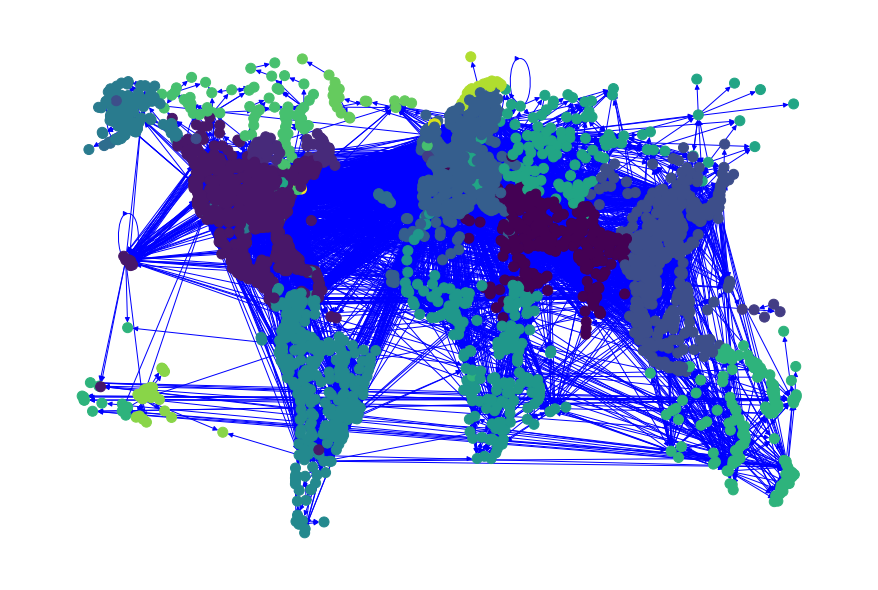

In [28]:
np.random.seed(2023)
Pos={c:(cities.loc[c,'long. most active airport'],cities.loc[c,'lat. most active airport'])for c in Flights.nodes()}
Flight_P, Flight_mod = pycombo.execute(Flights, max_communities = 0)
VisualPar(Flights,Flight_P,Pos)

# task 3. Compare weekend and weekday partitions of the taxi network

download data from: https://github.com/CUSP2020PUI/Data/raw/master/ridership.zip

## Q1. 
Aggregate provided daily taxi ridership into a) all weekend and b) all weekday ridership over the year

## Q2. 
Fit a gravity model $$ridership(o,d)\sim k\cdot pop(o) pop(d) travelime(o,d)^{-q}$$ to both networks, compare exponents (use log-scale linear regression with a slope coefficient $-q$ and intercent $\ln(k)$), replace zero ridership edges with a small number $1e-3$ for logarithm feasibility)

## Q3. 
Partition both networks using Combo algorithm, visualize and compare partitions

In [29]:
!wget https://github.com/CUSP2020PUI/Data/raw/master/ridership.zip

--2023-04-11 20:16:16--  https://github.com/CUSP2020PUI/Data/raw/master/ridership.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/CUSP2020PUI/Data/master/ridership.zip [following]
--2023-04-11 20:16:16--  https://raw.githubusercontent.com/CUSP2020PUI/Data/master/ridership.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 67607253 (64M) [application/zip]
Saving to: 'ridership.zip.3'

ridership.zip.3     100%[===================>]  64.47M  45.6MB/s    in 1.4s    

2023-04-11 20:16:18 (45.6 MB/s) - 'ridership.zip.3' saved [67607253/67607253]



### q1 Aggregate provided daily taxi ridership into a) all weekend and b) all weekday ridership over the year

In [30]:
df = pd.read_csv('https://github.com/CUSP2020PUI/Data/raw/master/ridership.zip')
import datetime
df['Date']=pd.to_datetime(df['Date'])
df['day_of_week']=df['Date'].dt.dayofweek
df

,Date,PULocationID,DOLocationID,vehicle_count,day_of_week
0,2019-09-01,114,237,56,6
1,2019-09-01,74,7,97,6
2,2019-09-01,48,230,366,6
3,2019-09-01,33,226,14,6
4,2019-09-01,198,256,119,6
...,...,...,...,...,...
13064057,2019-10-29,264,111,6,1
13064058,2019-10-30,60,125,1,2
13064059,2019-10-30,15,137,1,2
13064060,2019-10-30,185,206,1,2


In [31]:
#a) all weekend 
ridership_weekend=df[df['day_of_week'].isin([5,6])]
ridership_weekend

,Date,PULocationID,DOLocationID,vehicle_count,day_of_week
0,2019-09-01,114,237,56,6
1,2019-09-01,74,7,97,6
2,2019-09-01,48,230,366,6
3,2019-09-01,33,226,14,6
4,2019-09-01,198,256,119,6
...,...,...,...,...,...
13064043,2019-10-20,102,10,1,6
13064052,2019-10-26,264,190,25,5
13064053,2019-10-26,184,137,1,5
13064054,2019-10-27,264,241,340,6


In [32]:
#b) all weekday ridership over the year
ridership_weekday=df[df['day_of_week'].isin([0,1,2,3,4])]
ridership_weekday

,Date,PULocationID,DOLocationID,vehicle_count,day_of_week
48,2019-09-02,56,223,13,0
49,2019-09-02,145,48,49,0
50,2019-09-02,50,48,214,0
51,2019-09-02,223,254,3,0
52,2019-09-02,184,225,1,0
...,...,...,...,...,...
13064057,2019-10-29,264,111,6,1
13064058,2019-10-30,60,125,1,2
13064059,2019-10-30,15,137,1,2
13064060,2019-10-30,185,206,1,2


In [33]:
total_weekend=ridership_weekend['vehicle_count'].sum()
total_weekday=ridership_weekday['vehicle_count'].sum()
total_weekend,total_weekday

(109200422, 254357898)

### Q2 Fit a gravity model

In [34]:
#DEFINE THE GRAVAITY MODEL BY OURSELF
def GRAVELMODEL(p_o, p_d, t_od, count):   
    X = sm.add_constant(- np.log(t_od))
    y = np.log(count) - np.log(p_o) - np.log(p_d)    
    model = sm.OLS(y, X).fit()    
    return model

In [35]:
population = pd.read_csv('taxi_zone_pop.csv')
duration = pd.read_csv('tripduration.csv')
population

,location_id,Population
0,2,1785
1,8,1785
2,93,1785
3,96,1785
4,207,1785
...,...,...
255,254,57420
256,255,40130
257,256,40130
258,259,43583


In [36]:
duration

,PULocationID,DOLocationID,duration
0,1,1,457.029586
1,1,24,2772.000000
2,1,40,2665.000000
3,1,45,2013.000000
4,1,48,4525.000000
...,...,...,...
26035,265,261,1570.500000
26036,265,262,313.000000
26037,265,263,2134.000000
26038,265,264,8957.700000


In [37]:
#Merge the data
weekend_ride=ridership_weekend.merge(duration)
weekday_ride=ridership_weekday.merge(duration)
weekend=weekend_ride.merge(population,left_on='PULocationID',right_on='location_id')
weekend=weekend.merge(population,left_on='DOLocationID',right_on='location_id')
weekend.rename(columns={'Population_x':'O_population','Population_y':'D_population'},inplace = True)
weekend=weekend[['vehicle_count','duration','O_population','D_population','PULocationID','DOLocationID']]

weekend.loc[(weekend['O_population'] == 0), 'O_population'] = 1 
weekend.loc[(weekend['D_population'] == 0), 'D_population'] = 1 
weekend.loc[(weekend['vehicle_count'] == 0), 'vehicle_count'] = 0.001 

weekday=weekday_ride.merge(population,left_on='PULocationID',right_on='location_id')
weekday=weekday.merge(population,left_on='DOLocationID',right_on='location_id')
weekday.rename(columns={'Population_x':'O_population','Population_y':'D_population'},inplace = True)
weekday=weekday[['vehicle_count','duration','O_population','D_population','PULocationID','DOLocationID']]

weekday.loc[(weekday['O_population'] == 0), 'O_population'] = 1 
weekday.loc[(weekday['D_population'] == 0), 'D_population'] = 1 
weekday.loc[(weekday['vehicle_count'] == 0), 'vehicle_count'] = 0.001 

In [38]:
weekend

,vehicle_count,duration,O_population,D_population,PULocationID,DOLocationID
0,56.0,1361.4175,68483,63664,114,237
1,123.0,1361.4175,68483,63664,114,237
2,68.0,1361.4175,68483,63664,114,237
3,99.0,1361.4175,68483,63664,114,237
4,65.0,1361.4175,68483,63664,114,237
...,...,...,...,...,...,...
2258759,1.0,2895.0000,25807,39309,230,99
2258760,1.0,2895.0000,25807,39309,230,99
2258761,1.0,2341.0000,20088,39309,88,99
2258762,1.0,2341.0000,20088,39309,88,99


In [39]:
weekday

,vehicle_count,duration,O_population,D_population,PULocationID,DOLocationID
0,49.0,1425.5125,61947,40595,145,48
1,18.0,1425.5125,61947,40595,145,48
2,33.0,1425.5125,61947,40595,145,48
3,24.0,1425.5125,61947,40595,145,48
4,31.0,1425.5125,61947,40595,145,48
...,...,...,...,...,...,...
5502211,1.0,2341.0000,20088,39309,88,99
5502212,1.0,2341.0000,20088,39309,88,99
5502213,1.0,2341.0000,20088,39309,88,99
5502214,1.0,2341.0000,20088,39309,88,99


In [40]:
weekdays_model = GRAVELMODEL(weekday.O_population, weekday.D_population, \
                                 weekday.duration, weekday['vehicle_count'])
weekdays_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                 3.326e+05
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:16:30   Log-Likelihood:            -1.3661e+07
No. Observations:             5502216   AIC:                         2.732e+07
Df Residuals:                 5502214   BIC:                         2.732e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -10.0315      0.015   -685.647      0.000     -10.060     -10.003
duration       1.1602      0.002    576.752      0.000       1.156       1.164
==============================================================================
Omnibus:                  3367036.716   Durbin-Watson:                   0.048
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         32327941.983
Skew:                           2.896   Prob(JB):                         0.00
Kurtosis:                      13.366   Cond. No.                         87.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
weekdays_model.params[1]

1.1601598467037852

In [42]:
weekend_model = GRAVELMODEL(weekend.O_population, weekend.D_population, \
                                 weekend.duration, weekend['vehicle_count'])
weekend_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.059
Method:                 Least Squares   F-statistic:                 1.413e+05
Date:                Tue, 11 Apr 2023   Prob (F-statistic):               0.00
Time:                        20:16:30   Log-Likelihood:            -5.5439e+06
No. Observations:             2258764   AIC:                         1.109e+07
Df Residuals:                 2258762   BIC:                         1.109e+07
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -9.9544      0.022   -446.109      0.000      -9.998      -9.911
duration       1.1521      0.003    375.929      0.000       1.146       1.158
==============================================================================
Omnibus:                  1370741.675   Durbin-Watson:                   0.059
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         13184053.060
Skew:                           2.862   Prob(JB):                         0.00
Kurtosis:                      13.359   Cond. No.                         88.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
weekend_model.params[1]

1.1520817228355777

### Q3.Partition both networks using Combo algorithm, visualize and compare partitions

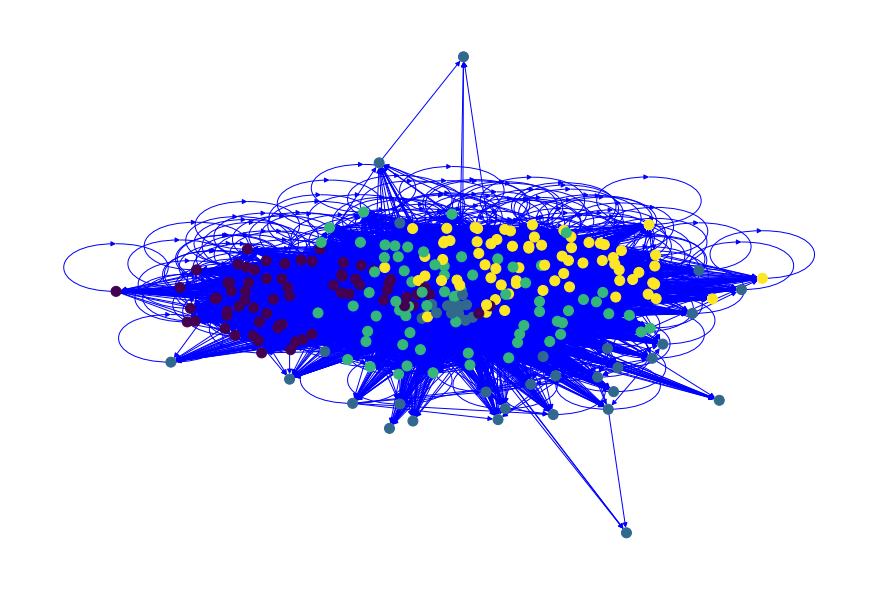

In [44]:
random.seed(2023)
weekdays= weekday[['PULocationID', 'DOLocationID', 'vehicle_count']]
weekday_Q3 = nx.from_pandas_edgelist(weekdays, 'PULocationID', 'DOLocationID', 'vehicle_count')
weekday_PC, weekday_mod = pycombo.execute(weekday_Q3, max_communities = 0)
VisualPar(weekday_Q3,weekday_PC,None)

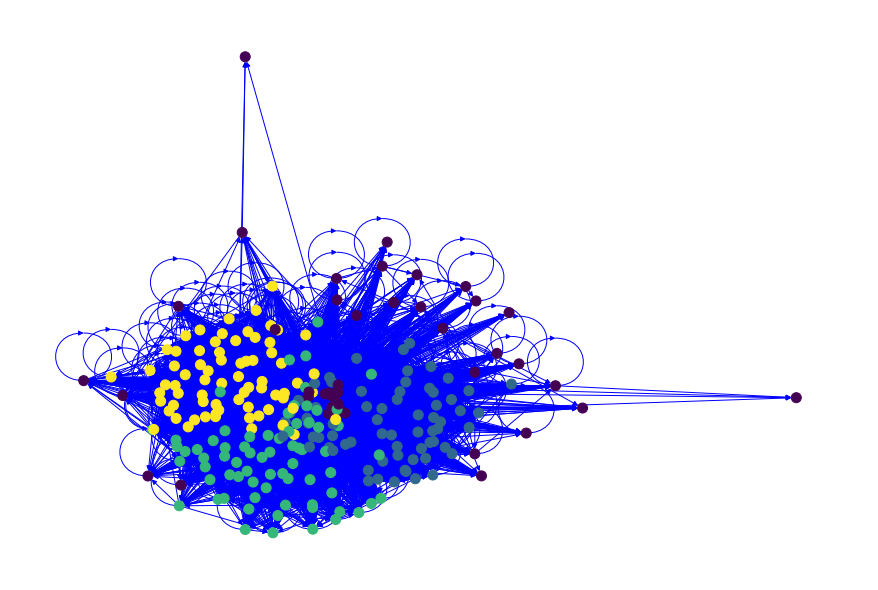

In [45]:
random.seed(2023)
weekends = weekend[['PULocationID', 'DOLocationID', 'vehicle_count']]
weekend_Q3 = nx.from_pandas_edgelist(weekends, 'PULocationID', 'DOLocationID', 'vehicle_count')
weekend_PC, weekend_mod = pycombo.execute(weekend_Q3, max_communities = 0)
VisualPar(weekend_Q3,weekend_PC,None)